# HIỂN THỊ DANH SÁCH CÁC ẢNH CỦA TẬP DỮ LIỆU

1. Yêu cầu chung: Hiển thị một số ảnh trong bộ dữ liệu theo từng phân loại
  + Ví dụ minh họa:
  <IMG SRC = 'https://editor.analyticsvidhya.com/uploads/762161_OSvbuPLy0PSM2nZ62SbtlQ.png'>
2. Yêu cầu cụ thể:
  - Input: tập tin .csv, trong đó mỗi dòng tương ứng với (đường dẫn) một ảnh và categoryID. Ví dụ tập tin MotocycleDataset-Splits-1-Train.csv (xem bài https://colab.research.google.com/drive/1gf0GzvW0tHddKtuvMUNIvglUT-J6oW6S?usp=sharing)
  - Output: như hình minh họa ở trên, mỗi dòng tương ứng với một CategoryID, số lượng ảnh, kích thước ảnh là các tham số với giá trị mặc định như sau
    + NumImgsPerRow = 10
    + ImgHeight = ImgWidth = 150
  - Các ảnh mỗi dòng được chọn ngẫu nhiên ở mỗi lần chạy

3. Nộp bài: SV share notebook. Các bài nộp sớm sẽ được full điểm. Deadline: 17:00 - 10/06/2024

4. Bài làm đạt yêu cầu sẽ được paste vào notebook với ghi nhận đóng góp từ tác giả.

#LỚP: CS114.O21

---


#Danh sách thành viên:


1.   22521266 : Trần Giang Sử
2.   22521332 : Nguyễn Dương Quốc Thắng
3.   22521402 : Đinh Quốc Thịnh


---



#NGÀY CẬP NHẬT: 9/6/2024

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


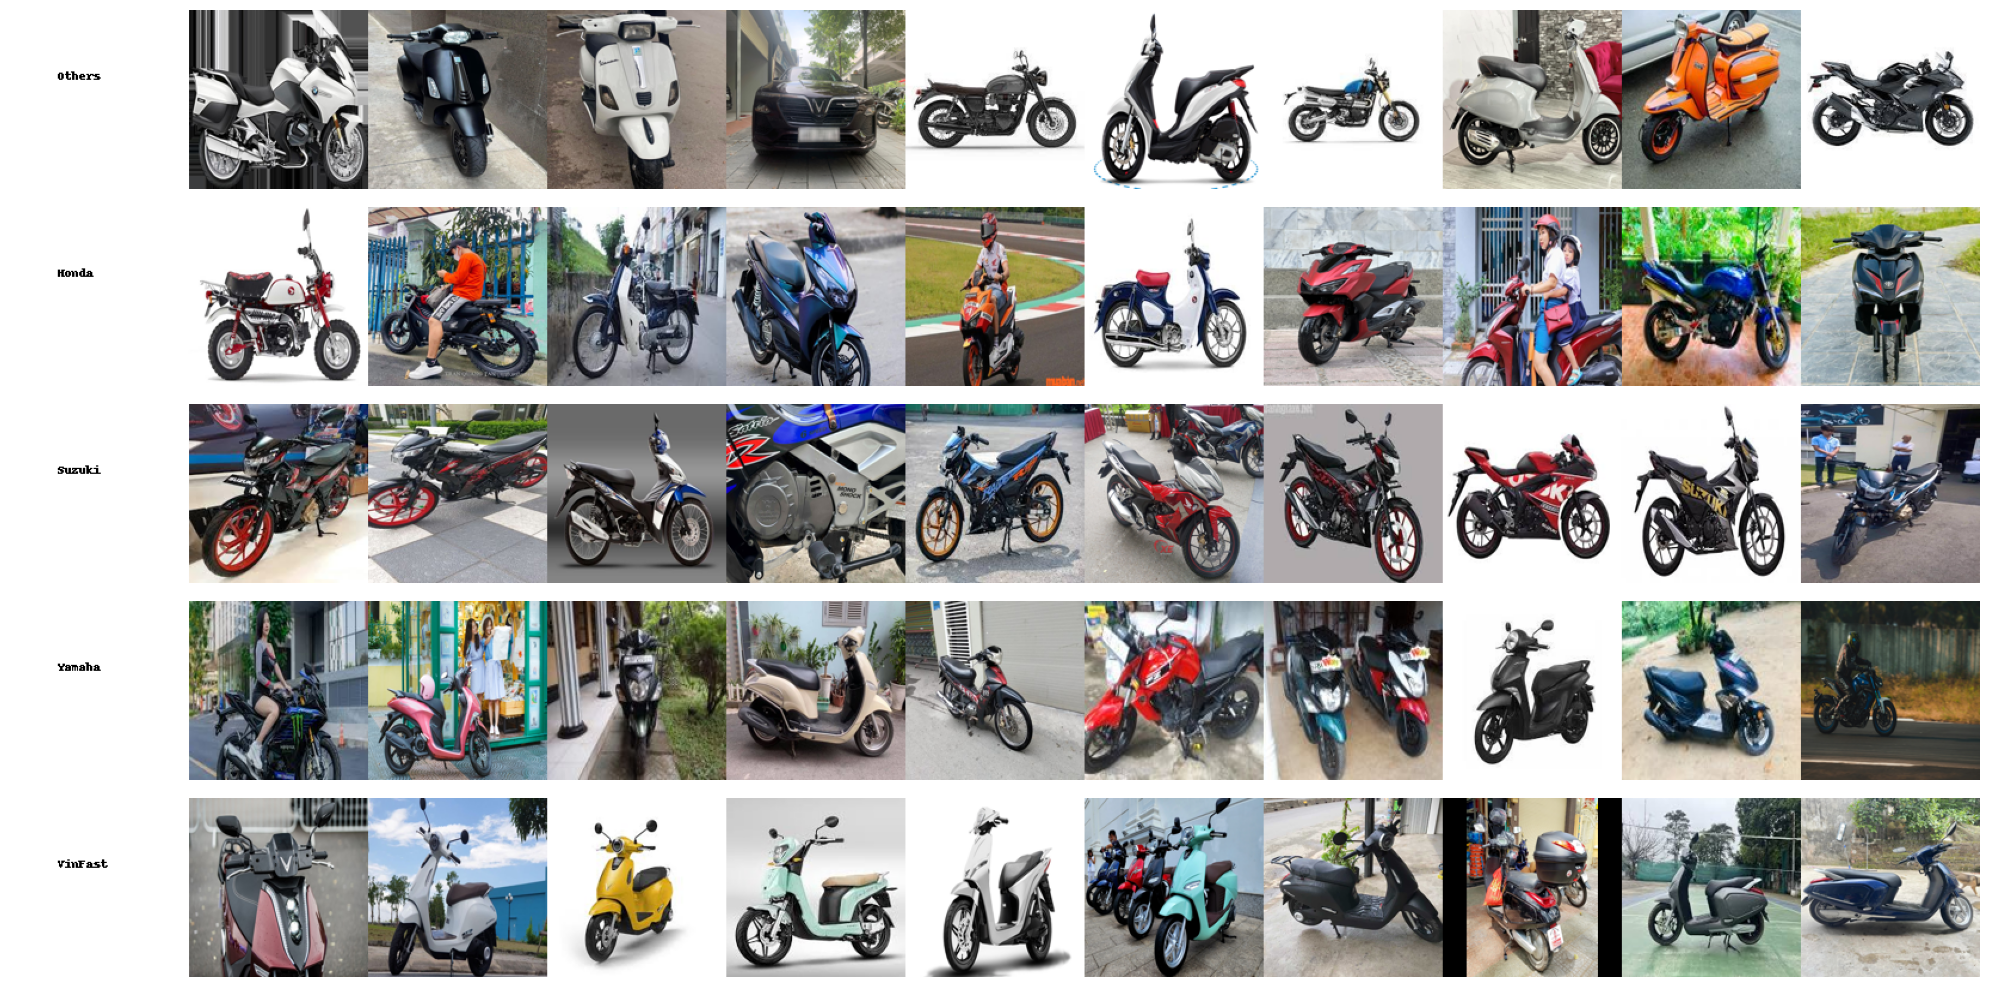

In [3]:
import pandas as pd
from PIL import Image, ImageDraw
import random
import os
from matplotlib import pyplot as plt

# Các tham số mặc định
NumImgsPerRow = 10 #số ảnh
ImgHeight = ImgWidth = 150 #WxH
FontSize = 24 #size chữ

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/drive/MyDrive/MotorcycleDatasetSplits/MotocycleDataset-Splits-1-Test.csv')


category_names = {
    0: 'Others',
    1: 'Honda',
    2: 'Suzuki',
    3: 'Yamaha',
    4: 'VinFast'
}

# Thư mục chứa các ảnh
image_folders = {
    0: '/content/drive/MyDrive/Public',
    1: '/content/drive/MyDrive/Public',
    2: '/content/drive/MyDrive/Public',
    3: '/content/drive/MyDrive/Public',
    4: '/content/drive/MyDrive/Public'
}

# Tạo figure cho biểu đồ
fig, axes = plt.subplots(nrows=len(category_names), ncols=1, figsize=(20, 10))

for ax, (category, name) in zip(axes, category_names.items()):
    # Lọc ra các ảnh thuộc category hiện tại
    category_df = df[df['Category'] == category]

    # Chọn ngẫu nhiên 10 ảnh
    selected_images = category_df.sample(n=min(NumImgsPerRow, len(category_df)))

    # Tạo một canvas trống để vẽ ảnh
    canvas = Image.new('RGB', (ImgWidth * (NumImgsPerRow + 1), ImgHeight), 'white')

    # Tạo một đối tượng để vẽ tên category
    draw = ImageDraw.Draw(canvas)
    draw.text((40, 50), name, fill='black')

    # Đọc và xử lý từng ảnh
    for i, (_, row) in enumerate(selected_images.iterrows(), start=1):
        if 'ImageFullPath' in row.index:
            img_path = os.path.join(image_folders[category], row['ImageFullPath'])
        else:
            print(f"Warning: 'ImageFullPath' column not found for category {name}. Skipping image {i}.")
            continue

        # Attempt to open and resize the image
        try:
            img = Image.open(img_path)
            img = img.resize((ImgWidth, ImgHeight))
        except (FileNotFoundError, IOError):
            print(f"Warning: Image file not found or cannot be opened at '{img_path}'. Skipping image {i}.")
            continue
        canvas.paste(img, (i * ImgWidth, 0))

    # Chuyển canvas thành array và hiển thị trên subplot tương ứng
    ax.imshow(canvas)
    ax.axis('off')  # Tắt trục tọa độ

plt.tight_layout()
plt.show()